In [4]:
!pip install langchain langchain_community langchain-google-genai langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 13.8 MB/s eta 0:00:00


In [5]:
#setup the enviromenet
from google.colab import userdata
GEMINI = userdata.get('GEMINI-API-KEY')
Tavily = userdata.get("TAVILY_API_KEY")
LANGSMITH = userdata.get("LANGSMITH_API_KEY")

In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI

Model = ChatGoogleGenerativeAI(
    model = "gemini-2.0-flash",
    api_key = GEMINI
)

Model.invoke("Who is imran khan niazi from pakistan").content

"Imran Khan Niazi is a Pakistani politician and former cricketer who served as the 22nd Prime Minister of Pakistan from August 2018 until April 2022.\n\nHere's a breakdown of his key aspects:\n\n*   **Early Life and Cricket Career:** Born in Lahore, Pakistan, in 1952, Khan received his education at Aitchison College, Lahore, and later at Keble College, Oxford. He rose to prominence as a world-class cricketer, captaining the Pakistan national cricket team to victory in the 1992 Cricket World Cup.\n\n*   **Political Career:** After retiring from cricket, Khan founded the Pakistan Tehreek-e-Insaf (PTI) political party in 1996. For many years, the PTI struggled to gain significant traction. However, Khan's anti-corruption platform and appeal to younger voters gradually increased the party's popularity.\n\n*   **Prime Minister of Pakistan (2018-2022):** In the 2018 general election, the PTI emerged as the largest party, and Khan became Prime Minister. His government focused on economic refo

# ***Router***

#for todays class first of all i will start from router what is it and how its work?
# router is nothign but used to take disicion weather should i go on tool or direct response these all things will decide by chatmodel
#FOR TOOL call we will make a new node for it
# and make a edge that will decide that toll node should call or direct response from the model.


In [20]:

from langchain.tools import tool
@tool
def addition_tools(a:int,b:int):
  """
  Add two numbers together a and b

  args:
    a:int first value
    b:int first value
  """
  return a + b

In [25]:
tool_list = [addition_tools]

In [21]:
Model_with_tool = Model.bind_tools([addition_tools])

In [22]:
Model_with_tool.invoke("what is 2 + 2")

AIMessage(content='', additional_kwargs={'function_call': {'name': 'addition_tools', 'arguments': '{"a": 2.0, "b": 2.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--3e527161-1a98-4ea8-ae7f-8647e9e44f3d-0', tool_calls=[{'name': 'addition_tools', 'args': {'a': 2.0, 'b': 2.0}, 'id': 'fa8c2073-60ca-4e7b-8c8b-a4a60a6ad70b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 41, 'output_tokens': 7, 'total_tokens': 48, 'input_token_details': {'cache_read': 0}})

In [32]:
from IPython.display import display, Image
from langchain_core.messages import AIMessage, HumanMessage, AnyMessage
from langgraph.graph import MessagesState, StateGraph, START, END
from langgraph.prebuilt.tool_node import ToolNode
from langgraph.prebuilt import tools_condition

def Model_calling(state: MessagesState):
    return {"messages": [Model_with_tool.invoke(state["messages"])]}

builder = StateGraph(MessagesState)
builder.add_node("Model_calling", Model_calling)
builder.add_node("tools", ToolNode(tools=tool_list))
builder.add_edge(START, "Model_calling")
builder.add_conditional_edges(
    "Model_calling",
    tools_condition
)
builder.add_edge("tools", END)
GRAPH = builder.compile()

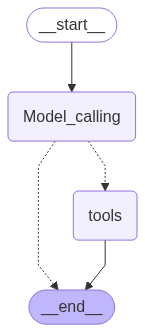

In [33]:
#draw the graph
try:
  display(Image(GRAPH.get_graph().draw_mermaid_png()))
except Exception as e:
  print(f"You have some problem at {e}")

In [47]:
#lets test the model
query = "do you know who is waris hayat abbasi"
message=GRAPH.invoke({"messages":[HumanMessage(content=query)]})

for m in message["messages"]:
  m.pretty_print()


================================ Human Message =================================

do you know who is waris hayat abbasi
================================== Ai Message ==================================

I do not have access to personal information about individuals.


In [42]:
#lets test the model
message=GRAPH.invoke({"messages":[HumanMessage(content="my name is waris,what is your name")]})
for m in message["messages"]:
  m.pretty_print()

================================ Human Message =================================

my name is waris,what is your name
================================== Ai Message ==================================

I am Gemini, a large language model.
